In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.ticker import MaxNLocator
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
from scipy.io import loadmat
import os
%matplotlib inline

In [2]:
Tot=300
dt=1./60
T=np.arange(dt,Tot,dt)
# OU ; input
tau= 1
D = 27*10**5
OU=np.zeros(len(T))
mu, sigma = 0, 1
for i in range(len(T)-1):
    OU[i+1]=OU[i]*(1-dt/tau)+math.sqrt(D*dt)*np.random.normal(mu,sigma)
# filtering for OUSmoothed
cutoffFreq = 1
b, a = signal.butter(2, 2*cutoffFreq*dt, btype='low', analog=False)
LPOU = signal.filtfilt(b, a, OU)

In [59]:
xs = LPOU-min(LPOU)
ys = []
zs = []
z = 0
y = 0
alpha = 19.9
beta =  0.62
k = 10
g = 30
dt = 1./60.
for x in xs:
    dy = (-alpha*y+k*(x-z))*dt
    dz = (-beta*z+g*y)*dt
    z = z+dz
    y = y+dy
    zs.append(z)
    ys.append(y)
zs = np.array(zs)
ys = np.array(ys)

In [60]:
Vx = ndimage.gaussian_filter1d(xs, sigma=1, order=1, mode='wrap') / dt
Vy = ndimage.gaussian_filter1d(ys, sigma=1, order=1, mode='wrap') / dt
Ax = ndimage.gaussian_filter1d(Vx, sigma=1, order=1, mode='wrap') / dt

0.12437306303364407

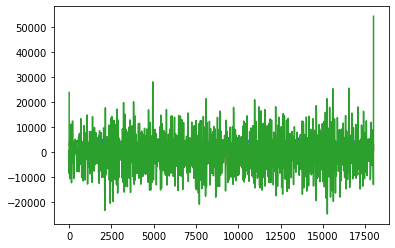

In [61]:
plt.plot(xs)
plt.plot(Vx)
plt.plot(Ax)
max(xs)/max(Ax)

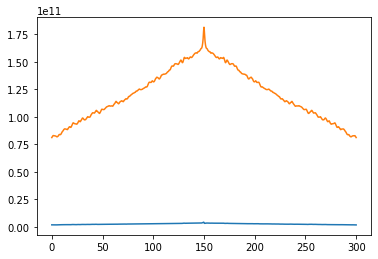

In [62]:
Xcorr_xy = np.correlate(xs,ys, 'same')
Xcorr_yz = np.correlate(ys,zs, 'same')
Xcorr_zz = np.correlate(zs,zs, 'same')
Xcorr_Vxy = np.correlate(Vx,Vy, 'same')
plt.plot(T, Xcorr_yz)
# plt.plot(np.correlate(ys,ys, 'same'))
plt.plot(T, Xcorr_zz)

In [63]:
np.argmax(Xcorr_yz)

8974

In [64]:
print('tau =', (np.argmax(Xcorr_zz)-np.argmax(Xcorr_yz))*dt) 

tau = 0.4166666666666667


In [65]:
print('one over k =', 1/k) 

one over k = 0.1


In [66]:
print('delta =', (np.argmax(Xcorr_xy)-np.argmax(Xcorr_zz))*dt)

delta = 0.36666666666666664


In [67]:
np.argmax(Xcorr_Vxy)

9012

In [68]:
(np.argmax(Xcorr_xy)-np.argmax(Xcorr_zz))*dt

0.36666666666666664

(7000, 7500)

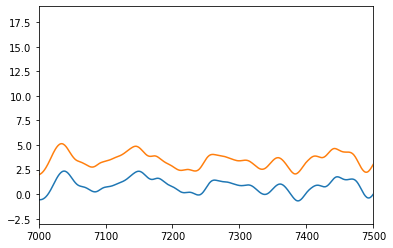

In [69]:
r = x+0.5*Vx
plt.plot(ys/np.std(ys))
plt.plot(r/np.std(r))
plt.xlim([7000, 7500])